In [1]:


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/google-stock/Google_Stock_Price_Train.csv
/kaggle/input/google-stock/Google_Stock_Price_Test.csv


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Importing the training set
dataset_train = pd.read_csv('../input/google-stock/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [5]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [8]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [9]:
# Creating a data structure with 60 timesteps and t+1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [12]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [13]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [16]:
# Importing the Keras libraries 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [17]:
#Architecture of RNN
# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 3, return_sequences = True, input_shape = (None, 1)))

# Adding a second LSTM layer
regressor.add(LSTM(units = 3, return_sequences = True))

# Adding a third LSTM layer
regressor.add(LSTM(units = 3, return_sequences = True))

# Adding a fourth LSTM layer
regressor.add(LSTM(units = 3))

# Adding the output layer
regressor.add(Dense(units = 1))


In [18]:
# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')


In [19]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 35)


Epoch 1/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.1286
Epoch 2/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0344
Epoch 3/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0084
Epoch 4/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0036
Epoch 5/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0030
Epoch 6/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0029
Epoch 7/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0028
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0028
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0026
Epoch 10/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0025
Epoch 11/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0025
Epoch 12/100
1198/1198 [==============================] - 8s 7ms/step - l

1198/1198 [==============================] - 8s 7ms/step - loss: 7.7898e-04
Epoch 97/100
1198/1198 [==============================] - 8s 7ms/step - loss: 7.9709e-04
Epoch 98/100
1198/1198 [==============================] - 8s 7ms/step - loss: 7.6838e-04
Epoch 99/100
1198/1198 [==============================] - 8s 7ms/step - loss: 7.7817e-04
Epoch 100/100
1198/1198 [==============================] - 8s 7ms/step - loss: 7.5087e-04


In [20]:
# Getting the real stock price 
dataset_test = pd.read_csv('../input/google-stock/Google_Stock_Price_Test.csv')
test_set = dataset_test.iloc[:,1:2].values
real_stock_price = np.concatenate((training_set[0:1258], test_set), axis = 0)

In [21]:
# Getting the predicted stock price 
scaled_real_stock_price = sc.fit_transform(real_stock_price)
inputs = []
for i in range(1258, 1278):
    inputs.append(scaled_real_stock_price[i-60:i, 0])
inputs = np.array(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


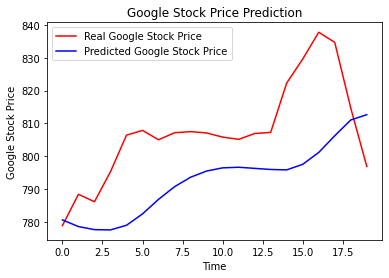

In [22]:
# Visualising the results
plt.plot(real_stock_price[1258:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

